In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', None, 'display.max_rows', None)

import acquire

In [2]:
#zillow = acquire.get_data_from_sql(acquire.sql)

In [3]:
# Save file to csv so I can quit asking the server for this data
#zillow.to_csv('zillow.csv')

In [4]:
zillow = pd.read_csv('zillow.csv', index_col='id')
zillow = zillow.drop(columns='Unnamed: 0')

In [5]:
zillow.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1087254,10711855,nan,nan,nan,2.00,3.00,nan,8.00,2.00,nan,nan,"2,107.00","2,107.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,222,559.00","-118,617,387.00","9,158.00",1.00,nan,nan,nan,1.00,0101,261.00,LARE9,"60,371,132.32","12,447.00","3,101.00","268,588.00","96,339.00",0.00,nan,nan,nan,1.00,nan,nan,"1,972.00",nan,nan,"249,655.00","624,139.00","2,016.00","374,484.00","7,659.36",NaN,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
1072280,10711877,1.00,nan,nan,2.00,4.00,nan,8.00,2.00,nan,nan,"1,882.00","1,882.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,220,261.00","-118,616,409.00","9,035.00",1.00,nan,nan,nan,1.00,0101,261.00,LARE9,"60,371,132.32","12,447.00","3,101.00","268,588.00","96,339.00",0.00,nan,nan,nan,1.00,nan,nan,"1,972.00",nan,nan,"253,000.00","660,000.00","2,016.00","407,000.00","8,123.91",NaN,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
1340933,10711888,1.00,nan,nan,2.00,4.00,nan,8.00,2.00,nan,nan,"1,882.00","1,882.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,222,491.00","-118,616,854.00","9,800.00",nan,nan,nan,nan,nan,0100,261.00,LARE9,"60,371,132.32","12,447.00","3,101.00","268,588.00","96,339.00",0.00,nan,nan,nan,1.00,nan,nan,"1,972.00",nan,nan,"257,591.00","542,923.00","2,016.00","285,332.00","6,673.24",NaN,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
1878109,10711910,nan,nan,nan,2.00,3.00,nan,8.00,2.00,nan,nan,"1,477.00","1,477.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,221,864.00","-118,615,739.00","11,285.00",1.00,nan,nan,nan,1.00,0101,261.00,LARE11,"60,371,132.32","12,447.00","3,101.00","268,588.00","96,339.00",0.00,nan,nan,nan,1.00,nan,nan,"1,960.00",nan,nan,"57,968.00","78,031.00","2,016.00","20,063.00","1,116.46",NaN,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
2190858,10711923,nan,nan,nan,2.00,4.00,nan,8.00,2.00,nan,nan,"1,918.00","1,918.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,220,619.00","-118,615,253.00","11,239.00",1.00,nan,nan,nan,1.00,0101,261.00,LARE11,"60,371,132.32","12,447.00","3,101.00","268,588.00","96,339.00",0.00,nan,nan,nan,1.00,nan,nan,"1,960.00",nan,nan,"167,869.00","415,459.00","2,016.00","247,590.00","5,239.85",NaN,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


### Summarize data

In [6]:
zillow.shape

(77575, 67)

In [7]:
zillow.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,"77,575.00","25,006.00",206.00,50.00,"77,575.00","77,575.00",15.00,"49,809.00","76,960.00",614.00,"6,035.00","77,375.00","73,920.00",42.00,"3,027.00","6,035.00",386.00,"77,575.00","8,287.00","76,960.00","25,517.00","25,517.00","1,539.00","49,570.00","77,575.00","77,575.00","69,318.00","16,173.00",869.00,465.00,"1,074.00","15,078.00","77,575.00","77,575.00","76,103.00","77,575.00","30,973.00","77,525.00","77,575.00",50.00,"10,105.00",222.00,"50,703.00","2,393.00",70.00,"77,306.00","17,596.00",172.00,"77,460.00","77,574.00","77,575.00","77,573.00","77,570.00","2,900.00","77,328.00","77,575.00"
mean,"13,006,298.98",1.81,7.39,679.72,2.30,3.05,3.93,6.53,2.32,66.00,"1,366.20","1,784.94","1,760.29","1,388.76","2,354.49","1,381.43","2,082.50","6,048.81",1.19,2.25,1.82,350.06,1.00,3.92,"34,008,366.13","-118,203,713.57","29,974.45",1.00,517.93,1.00,1.00,1.00,261.82,"60,491,228.76","33,683.39","2,534.54","187,730.30","96,586.68",1.48,7.00,1.01,6.04,1.11,305.46,216.39,"1,968.61",1.43,1.00,"189,281.45","490,144.70","2,016.00","301,145.30","5,995.82",14.09,"60,496,658,430,262.86",0.02
std,"3,478,020.75",2.97,2.73,689.70,1.00,1.14,0.26,1.72,0.98,0.00,670.80,954.26,934.36,122.22,"1,186.99",725.90,"1,240.38",20.75,0.49,0.97,0.59,261.65,0.00,3.59,"265,287.75","359,382.61","123,307.62",0.00,156.57,0.00,0.00,0.00,5.14,"205,876.80","47,212.86",801.45,"165,045.23","3,793.65",2.82,0.00,0.12,0.56,1.17,238.74,190.18,23.79,0.54,0.00,"230,413.73","653,802.18",0.00,"492,728.73","7,628.87",2.18,"1,533,375,678,743.79",0.17
min,"10,711,855.00",1.00,2.00,38.00,0.00,0.00,3.00,1.00,1.00,66.00,44.00,128.00,128.00,"1,056.00",598.00,44.00,380.00,"6,037.00",1.00,1.00,0.00,0.00,1.00,1.00,"33,339,527.00","-119,475,416.00",236.00,1.00,24.00,1.00,1.00,1.00,31.00,"60,371,011.10","3,491.00","1,286.00","6,952.00","95,982.00",0.00,7.00,1.00,4.00,1.00,11.00,12.00,"1,824.00",1.00,1.00,44.00,"1,000.00","2,016.00",161.00,19.92,3.00,"60,371,011,101,000.00",-4.66
25%,"11,538,198.00",1.00,7.00,273.00,2.00,2.00,4.00,6.00,2.00,66.00,955.00,"1,182.00","1,172.00","1,344.00","1,624.00",956.00,993.75,"6,037.00",1.00,2.00,2.00,0.00,1.00,2.00,"33,814,629.00","-118,415,000.00","5,700.00",1.00,424.00,1.00,1.00,1.00,261.00,"60,373,109.00","12,447.00","1,286.00","46,736.00","96,193.00",0.00,7.00,1.00,6.00,1.00,170.00,61.50,"1,953.00",1.00,1.00,"84,182.00","206,898.50","2,016.00","85,293.00","2,712.63",14.00,"60,373,109,004,005.00",-0.02
50%,"12,530,531.00",1.00,7.00,515.00,2.00,3.00,4.00,6.00,2.00,66.00,"1,257.00","1,542.00","1,523.00","1,440.00","2,088.00","1,259.00","1,812.50","6,037.00",1.00,2.00,2.00,436.00,1.00,2.00,"34,022,000.00","-118,181,000.00","7,206.00",1.00,500.00,1.00,1.00,1.00,261.00,"60,376,031.02","25,218.00","3,101.00","118,849.00","96,389.00",0.00,7.00,1.00,6.00,1.00,250.00,164.50,"1,970.00",1.00,1.00,"136,404.50","358,878.50","2,016.00","203,174.00","4,448.26",15.00,"60,376,032,001,020.00",0.01
75%,"14,211,235.50",1.00,7.00,796.50,3.00,4.00,4.00,8.00,3.00,66.00,"1,615.00","2,112.00","2,075.00","1,440.00","2,831.00","1,621.00","3,053.50","6,059.00",1.00,3.00,2.00,492.00,1.00,7

In [8]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 1087254 to 2535331
Data columns (total 67 columns):
parcelid                        77575 non-null int64
airconditioningtypeid           25006 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77575 non-null float64
bedroomcnt                      77575 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49809 non-null float64
calculatedbathnbr               76960 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6035 non-null float64
calculatedfinishedsquarefeet    77375 non-null float64
finishedsquarefeet12            73920 non-null float64
finishedsquarefeet13            42 non-null float64
finishedsquarefeet15            3027 non-null float64
finishedsquarefeet50            6035 non-null float64
finishedsquarefeet6  

In [9]:
zillow.isna().sum()

parcelid                            0
airconditioningtypeid           52569
architecturalstyletypeid        77369
basementsqft                    77525
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             77560
buildingqualitytypeid           27766
calculatedbathnbr                 615
decktypeid                      76961
finishedfloor1squarefeet        71540
calculatedfinishedsquarefeet      200
finishedsquarefeet12             3655
finishedsquarefeet13            77533
finishedsquarefeet15            74548
finishedsquarefeet50            71540
finishedsquarefeet6             77189
fips                                0
fireplacecnt                    69288
fullbathcnt                       615
garagecarcnt                    52058
garagetotalsqft                 52058
hashottuborspa                  76036
heatingorsystemtypeid           28005
latitude                            0
longitude                           0
lotsizesquar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128607690>,
      dtype=object)

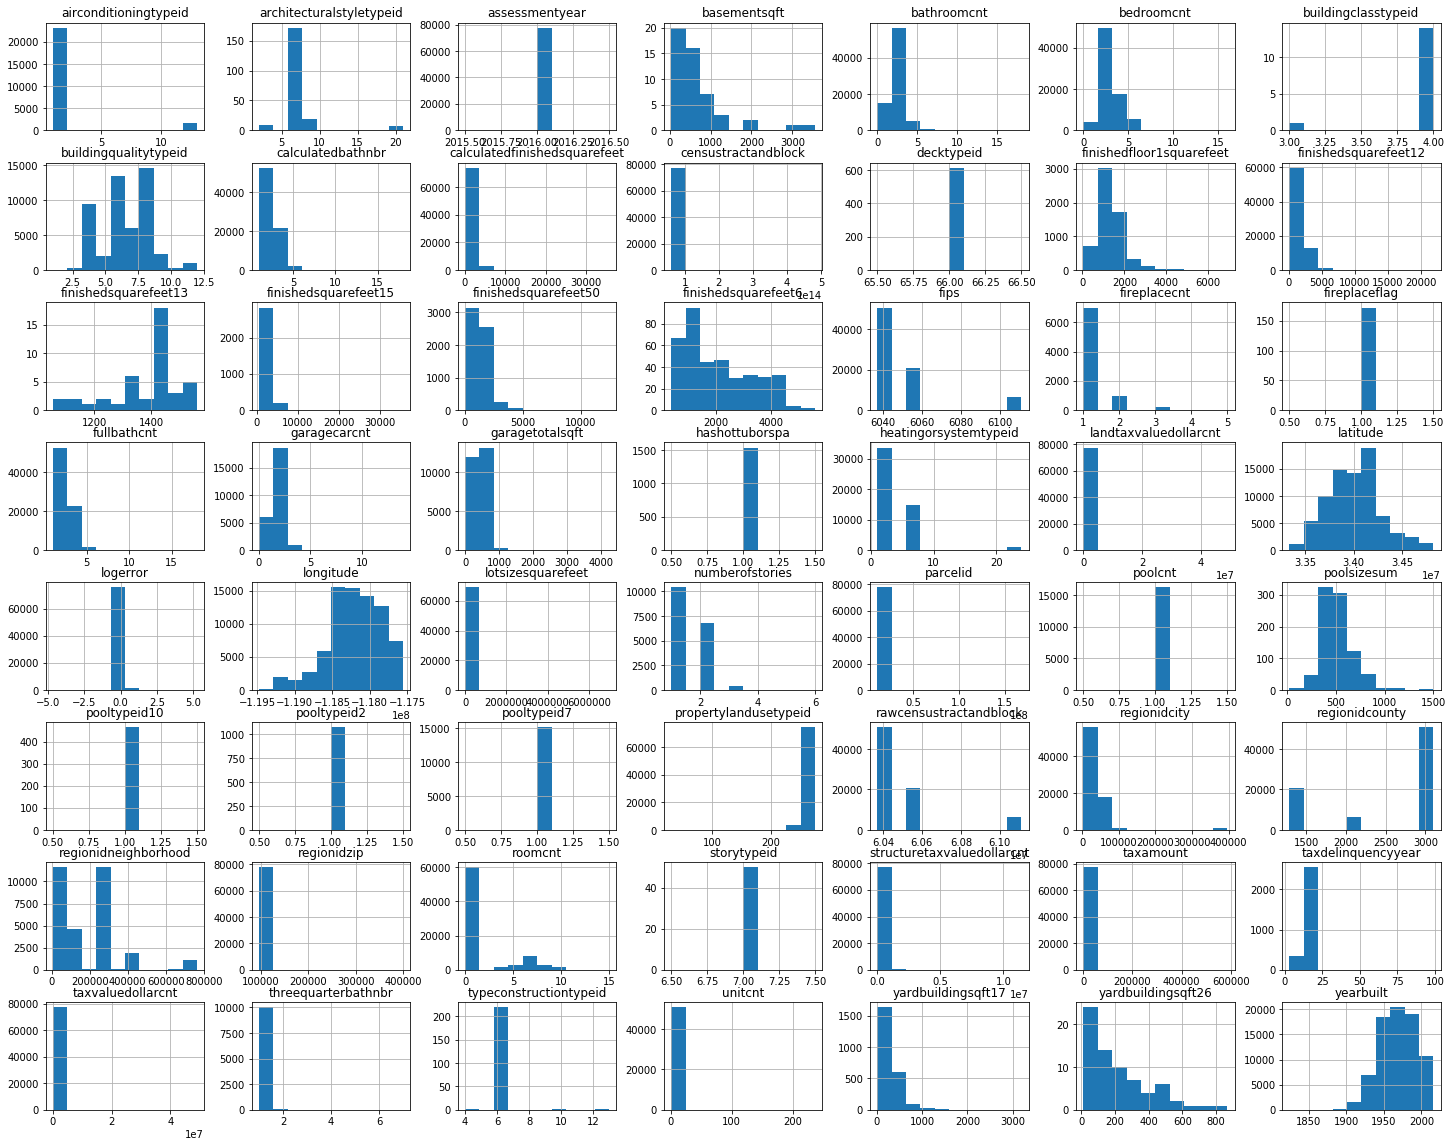

In [10]:
# Distributions of each column
zillow.hist(figsize=(25, 20))

### Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [11]:
df = pd.DataFrame(zillow.isna().sum())
df

,0
parcelid,0
airconditioningtypeid,52569
architecturalstyletypeid,77369
basementsqft,77525
bathroomcnt,0
bedroomcnt,0
buildingclasstypeid,77560
buildingqualitytypeid,27766
calculatedbathnbr,615
decktypeid,76961


In [12]:
df = df.rename(columns={0 : 'num'})
df

,num
parcelid,0
airconditioningtypeid,52569
architecturalstyletypeid,77369
basementsqft,77525
bathroomcnt,0
bedroomcnt,0
buildingclasstypeid,77560
buildingqualitytypeid,27766
calculatedbathnbr,615
decktypeid,76961


In [13]:
def missing_rows(df):
    new_df = pd.DataFrame(df.isna().sum())
    new_df = new_df.rename(columns={0 : 'num_rows_missing'})
    new_df['pct_rows_missing'] = (new_df.num_rows_missing / len(df)).round(4)
    return new_df

In [14]:
missing_rows(zillow)

,num_rows_missing,pct_rows_missing
parcelid,0,0.00
airconditioningtypeid,52569,0.68
architecturalstyletypeid,77369,1.00
basementsqft,77525,1.00
bathroomcnt,0,0.00
bedroomcnt,0,0.00
buildingclasstypeid,77560,1.00
buildingqualitytypeid,27766,0.36
calculatedbathnbr,615,0.01
decktypeid,76961,0.99


### Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [15]:
df = pd.DataFrame(zillow.isnull().sum(axis=1).value_counts())
df = df.reset_index()
df

,index,0
0,33,14817
1,34,13357
2,32,12606
3,31,9911
4,36,5793
5,29,5285
6,35,5163
7,37,3630
8,30,3465
9,38,1932


In [16]:
df = df.rename(columns={'index':'num_cols_missing', 0:'num_rows'})
df

,num_cols_missing,num_rows
0,33,14817
1,34,13357
2,32,12606
3,31,9911
4,36,5793
5,29,5285
6,35,5163
7,37,3630
8,30,3465
9,38,1932


In [17]:
def missing_cols(df):
    new_df = pd.DataFrame(df.isnull().sum(axis=1).value_counts())
    new_df = new_df.reset_index()
    new_df = new_df.rename(columns={'index':'num_cols_missing', 0:'num_rows'})
    new_df['pct_cols_missing'] = (new_df.num_cols_missing / df.shape[1])*100
    return new_df

In [18]:
missing_cols(zillow)

,num_cols_missing,num_rows,pct_cols_missing
0,33,14817,49.25
1,34,13357,50.75
2,32,12606,47.76
3,31,9911,46.27
4,36,5793,53.73
5,29,5285,43.28
6,35,5163,52.24
7,37,3630,55.22
8,30,3465,44.78
9,38,1932,56.72


## Prepare

### Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [19]:
zillow[zillow.bedroomcnt < 1].propertylandusedesc.value_counts()

Condominium                                   286
Duplex (2 Units, Any Combination)             164
Single Family Residential                     137
Quadruplex (4 Units, Any Combination)         112
Triplex (3 Units, Any Combination)             50
Residential General                            30
Manufactured, Modular, Prefabricated Homes     24
Mobile Home                                    15
Commercial/Office/Residential Mixed Used       15
Planned Unit Development                        3
Name: propertylandusedesc, dtype: int64

In [20]:
zillow.propertylandusedesc.value_counts()

Single Family Residential                     52439
Condominium                                   19341
Duplex (2 Units, Any Combination)              2021
Planned Unit Development                       1947
Quadruplex (4 Units, Any Combination)           729
Triplex (3 Units, Any Combination)              539
Cluster Home                                    335
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       59
Residential General                              41
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [21]:
zillow.propertylandusetypeid.value_counts()

261.00    52439
266.00    19341
246.00     2021
269.00     1947
248.00      729
247.00      539
265.00      335
263.00       74
275.00       59
260.00       41
267.00       29
 31.00       15
264.00        6
Name: propertylandusetypeid, dtype: int64

single use property codes to keep: propertylandusetypeid [261, 262, 263, 264, 266, 268, 273, 276, 279]]

In [22]:
single_use = [260, 261, 262, 279]

zillow = zillow[zillow.propertylandusetypeid.isin(single_use)]

In [23]:
zillow = zillow[(zillow.bedroomcnt > 0) & (zillow.bathroomcnt > 0)]

zillow.shape

(52297, 67)

### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

    The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
    
    The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
    
    hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [24]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [25]:
# I actually don't like this function, I want to handle missing values differently

Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [26]:
# 70% of the rows in the df = 36,600
zillow.shape[0] * 0.7

36607.899999999994

In [27]:
zillow.isna().sum()

parcelid                            0
airconditioningtypeid           38665
architecturalstyletypeid        52227
basementsqft                    52250
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             52297
buildingqualitytypeid           18573
calculatedbathnbr                  16
decktypeid                      51910
finishedfloor1squarefeet        47935
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
finishedsquarefeet13            52297
finishedsquarefeet15            52297
finishedsquarefeet50            47935
finishedsquarefeet6             52139
fips                                0
fireplacecnt                    45068
fullbathcnt                        16
garagecarcnt                    34302
garagetotalsqft                 34302
hashottuborspa                  50782
heatingorsystemtypeid           18378
latitude                            0
longitude                           0
lotsizesquar

In [28]:
# bathroomcnt + bedroomcnt same as calculatedbathnbr?
# nope, that column is literally the bathroomcnt column duplicated
# and fullbathcnt is also duplicated bathroomcnt
df = zillow[['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'threequarterbathnbr']]
df.head(25)

,bathroomcnt,bedroomcnt,calculatedbathnbr,fullbathcnt,threequarterbathnbr
id,,,,,
1087254,2.00,3.00,2.00,2.00,nan
1072280,2.00,4.00,2.00,2.00,nan
1340933,2.00,4.00,2.00,2.00,nan
1878109,2.00,3.00,2.00,2.00,nan
2190858,2.00,4.00,2.00,2.00,nan
281974,2.00,3.00,2.00,2.00,nan
2981006,3.00,3.00,3.00,3.00,nan
2548580,2.00,4.00,2.00,2.00,nan
1699185,2.00,3.00,2.00,2.00,nan


In [29]:
# investigate sq feet - only need one column - will use finishedsquarefeet12
df = zillow[[
    'finishedfloor1squarefeet',
    'calculatedfinishedsquarefeet',
    'finishedsquarefeet12',
    'finishedsquarefeet13',
    'finishedsquarefeet15',
    'finishedsquarefeet50',
    'finishedsquarefeet6'
            ]]
df.head(25)

,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6
id,,,,,,,
1087254,nan,"2,107.00","2,107.00",nan,nan,nan,nan
1072280,nan,"1,882.00","1,882.00",nan,nan,nan,nan
1340933,nan,"1,882.00","1,882.00",nan,nan,nan,nan
1878109,nan,"1,477.00","1,477.00",nan,nan,nan,nan
2190858,nan,"1,918.00","1,918.00",nan,nan,nan,nan
281974,nan,"2,031.00","2,031.00",nan,nan,nan,nan
2981006,nan,"1,678.00","1,678.00",nan,nan,nan,nan
2548580,nan,"1,882.00","1,882.00",nan,nan,nan,nan
1699185,nan,"1,709.00","1,709.00",nan,nan,nan,nan


In [30]:
# investigate regionidzip
zillow.regionidzip.value_counts()

 97,319.00    774
 97,318.00    671
 97,329.00    564
 97,328.00    519
 97,118.00    498
 96,987.00    470
 96,193.00    424
 97,078.00    389
 96,996.00    381
 97,116.00    366
 97,330.00    356
 96,989.00    352
 97,317.00    347
 96,995.00    347
 96,370.00    344
 96,351.00    341
 96,962.00    331
 96,186.00    321
 96,242.00    314
 96,964.00    306
 97,068.00    294
 96,990.00    292
 96,364.00    287
 96,368.00    282
 97,008.00    282
 96,978.00    280
 97,026.00    280
 96,122.00    277
 96,387.00    276
 97,089.00    273
 96,383.00    272
 96,966.00    270
 96,180.00    268
 96,993.00    268
 97,097.00    265
 97,041.00    264
 96,985.00    263
 96,185.00    262
 96,212.00    262
 96,117.00    262
 96,373.00    260
 96,983.00    258
 96,505.00    257
 97,065.00    255
 97,005.00    254
 96,488.00    251
 96,958.00    246
 96,489.00    245
 96,247.00    244
 96,522.00    243
 96,239.00    239
 96,213.00    238
 96,954.00    238
 96,385.00    238
 96,342.00    236
 96,998.00

In [31]:
# Investigate stories - will drop storytype id because its not informational and duplicates number of stories
zillow.storytypeid.value_counts(), zillow.numberofstories.value_counts()

(7.00    47
 Name: storytypeid, dtype: int64, 1.00    8871
 2.00    5309
 3.00     352
 6.00       1
 Name: numberofstories, dtype: int64)

In [32]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [33]:
# Columns to drop completely
architecturalstyletypeid        71200
buildingclasstypeid             71406
finishedsquarefeet12              177
finishedsquarefeet13            71406
finishedsquarefeet15            71397
finishedsquarefeet50            65728
finishedsquarefeet6             71248
finishedfloor1squarefeet        65728
pooltypeid10                    70942
pooltypeid2                     70332
pooltypeid7                     56829
fireplaceflag                   71234
airconditioningdesc             48493
storydesc                       71359
heatingorsystemdesc             24966
architecturalstyledesc          71200
buildingclassdesc               71406
typeconstructiondesc            71184
yardbuildingsqft17              69165
yardbuildingsqft26              71336
calculatedbathnbr                  16
fullbathcnt                        16
threequarterbathnbr             61409
typeconstructiontypeid          71184
storytypeid                     71359

SyntaxError: invalid syntax (<ipython-input-33-069001358e94>, line 2)

In [34]:
zillow = remove_columns(zillow, [
    'architecturalstyletypeid', 'buildingclasstypeid',
    'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
    'finishedsquarefeet6', 'finishedfloor1squarefeet', 'pooltypeid10',
    'pooltypeid2', 'pooltypeid7', 'fireplaceflag', 'airconditioningdesc',
    'storydesc', 'heatingorsystemdesc', 'architecturalstyledesc', 'buildingclassdesc',
    'typeconstructiondesc', 'yardbuildingsqft17', 'yardbuildingsqft26', 'calculatedbathnbr',
    'fullbathcnt', 'threequarterbathnbr', 'typeconstructiontypeid', 'storytypeid',
    'propertyzoningdesc', 'calculatedfinishedsquarefeet', 'regionidneighborhood',
    'regionidcity', 'regionidzip'
                                ])

In [35]:
# these null values means the condition isn't relevant, so fill with 0 or None
zillow.airconditioningtypeid.fillna(0, inplace=True)
zillow.basementsqft.fillna(0, inplace=True)
zillow.decktypeid.fillna(0, inplace=True)
zillow.fireplacecnt.fillna(0, inplace=True)
zillow.garagecarcnt.fillna(0, inplace=True)
zillow.garagetotalsqft.fillna(0, inplace=True)
zillow.hashottuborspa.fillna(0, inplace=True)
# For heating type, None = 13
zillow.heatingorsystemtypeid.fillna(13, inplace=True)
zillow.lotsizesquarefeet.fillna(0, inplace=True)
zillow.poolcnt.fillna(0, inplace=True)
zillow.poolsizesum.fillna(0, inplace=True)
zillow.taxdelinquencyflag.fillna(0, inplace=True)
zillow.taxdelinquencyyear.fillna(0, inplace=True)

In [36]:
# Fill numberofstories with single story value (assume single story)
zillow.numberofstories.value_counts()

1.00    8871
2.00    5309
3.00     352
6.00       1
Name: numberofstories, dtype: int64

In [37]:
zillow.numberofstories.fillna(1, inplace=True)

In [38]:
# Fill nulls in unitcnt with most common value
zillow.unitcnt.value_counts()

1.00    33782
2.00       28
4.00        3
3.00        1
Name: unitcnt, dtype: int64

In [39]:
zillow.unitcnt.fillna(1, inplace=True)

In [40]:
# Fill buildingqualitytypeid with most common value
zillow.buildingqualitytypeid.value_counts()

 6.00    10286
 8.00     8246
 4.00     8151
 7.00     3425
 5.00     1508
 9.00     1123
11.00      515
10.00      228
 3.00      150
12.00       81
 1.00        8
 2.00        3
Name: buildingqualitytypeid, dtype: int64

In [41]:
zillow.buildingqualitytypeid.fillna(6, inplace=True)

In [42]:
# Fill nulls in yearbuilt with most common value
zillow.yearbuilt.value_counts()

1,955.00    1897
1,950.00    1605
1,954.00    1521
1,953.00    1485
1,956.00    1387
1,964.00    1302
1,952.00    1201
1,951.00    1190
1,959.00    1066
1,963.00    1016
1,957.00    1007
1,947.00    1006
1,962.00     999
1,965.00     987
1,949.00     971
1,948.00     930
1,960.00     877
1,989.00     832
1,961.00     816
1,977.00     802
1,958.00     786
1,976.00     733
1,973.00     703
1,972.00     698
1,987.00     667
1,978.00     644
1,969.00     622
1,968.00     616
1,979.00     606
1,990.00     595
1,986.00     589
1,971.00     583
1,966.00     564
1,923.00     531
1,941.00     525
1,940.00     516
1,924.00     502
2,001.00     493
1,988.00     491
1,925.00     479
1,985.00     476
2,005.00     472
2,000.00     472
1,970.00     469
2,003.00     464
1,999.00     444
1,939.00     439
2,004.00     432
1,980.00     427
1,926.00     425
1,967.00     423
1,974.00     423
2,006.00     417
2,002.00     414
1,984.00     402
1,998.00     395
1,997.00     389
1,946.00     388
1,922.00     3

In [43]:
zillow.yearbuilt.fillna(1955, inplace=True)

In [46]:
# Drop rows with null values in certain columns
zillow = zillow.dropna(subset=[
    'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
    'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock',
    'finishedsquarefeet12'])

In [47]:
zillow.isna().sum()

parcelid                      0
airconditioningtypeid         0
basementsqft                  0
bathroomcnt                   0
bedroomcnt                    0
buildingqualitytypeid         0
decktypeid                    0
finishedsquarefeet12          0
fips                          0
fireplacecnt                  0
garagecarcnt                  0
garagetotalsqft               0
hashottuborspa                0
heatingorsystemtypeid         0
latitude                      0
longitude                     0
lotsizesquarefeet             0
poolcnt                       0
poolsizesum                   0
propertycountylandusecode     0
propertylandusetypeid         0
rawcensustractandblock        0
regionidcounty                0
roomcnt                       0
unitcnt                       0
yearbuilt                     0
numberofstories               0
structuretaxvaluedollarcnt    0
taxvaluedollarcnt             0
assessmentyear                0
landtaxvaluedollarcnt         0
taxamoun

In [49]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51951 entries, 1087254 to 1671696
Data columns (total 38 columns):
parcelid                      51951 non-null int64
airconditioningtypeid         51951 non-null float64
basementsqft                  51951 non-null float64
bathroomcnt                   51951 non-null float64
bedroomcnt                    51951 non-null float64
buildingqualitytypeid         51951 non-null float64
decktypeid                    51951 non-null float64
finishedsquarefeet12          51951 non-null float64
fips                          51951 non-null float64
fireplacecnt                  51951 non-null float64
garagecarcnt                  51951 non-null float64
garagetotalsqft               51951 non-null float64
hashottuborspa                51951 non-null float64
heatingorsystemtypeid         51951 non-null float64
latitude                      51951 non-null float64
longitude                     51951 non-null float64
lotsizesquarefeet             51951 n

In [ ]:
# Convert the individual columns to their appropriate dtypes

In [76]:
zillow = zillow.astype({
    'airconditioningtypeid': int,
    'basementsqft': int,
    'bedroomcnt': int,
    'buildingqualitytypeid': int,
    'decktypeid': int,
    'finishedsquarefeet12': int,
    'fips': int,
    'fireplacecnt': int,
    'garagecarcnt': int,
    'garagetotalsqft': int,
    'hashottuborspa': int,
    'heatingorsystemtypeid': int,
    'lotsizesquarefeet': int,
    'poolcnt': int,
    'poolsizesum': int,
    'propertycountylandusecode': str,
    'regionidcounty': int,
    'roomcnt': int,
    'unitcnt': int,
    'yearbuilt': int,
    'numberofstories': int,
    'assessmentyear': int,
    'taxdelinquencyflag': str,
    'taxdelinquencyyear': int,
    'censustractandblock': str})